## 데이터 집계

### 1. 데이터의 종류

수치형/범주형/날짜형

In [4]:
import pandas as pd

data = {
    '나이': [25, 32, 41, 29, 36], # 수치형
    '성별': ['남', '여', '여', '남', '남'], # 범주형 
    '급여': [300, 420, 500, 380, 450], # 수치형
    '생년월일': ['1999-05-12', '1992-08-03', '1983-11-25', '1995-02-17', '1988-09-09']  # 날짜형
}

df = pd.DataFrame(data)
df

,나이,성별,급여,생년월일
0,25,남,300,1999-05-12
1,32,여,420,1992-08-03
2,41,여,500,1983-11-25
3,29,남,380,1995-02-17
4,36,남,450,1988-09-09


### 2. 데이터 요약

수치형 데이터 요약하기
- count : 개수
- mean : 평균
- std : 표준편차
- min : 제일 작은 값
- 25% : 25%에 해당하는 값
- 50% : 50%에 해당하는 값
- 75% : 75%에 해당하는 값
- max : 제일 큰 값

In [5]:
df.describe()

,나이,급여
count,5.000000,5.000000
mean,32.600000,410.000000
std,6.188699,75.498344
min,25.000000,300.000000
25%,29.000000,380.000000
50%,32.000000,420.000000
75%,36.000000,450.000000
max,41.000000,500.000000


기본 집계 함수 (sum / mean / count)

In [7]:
# 급여
s = df['급여']

# 합계
print("급여 합계:", df['급여'].sum())

# 평균
print("급여 평균:", df['급여'].mean())

# 개수
print("데이터 개수:", df['급여'].count())

급여 합계: 2050
급여 평균: 410.0
데이터 개수: 5


범주형 데이터 요약하기 (unique / value_counts)
- unique: 유일한 값만 반환
- value_counts: 각 값의 갯수를 반환

In [14]:
# 성별의 고유값
print("성별의 고유값:", df['성별'].unique())

# 성별의 빈도수
print("성별의 빈도수:")
print(df['성별'].value_counts())

성별의 고유값: ['남' '여']
성별의 빈도수:
성별
남    3
여    2
Name: count, dtype: int64


In [16]:
print("성별의 빈도수:")
print(df['성별'].value_counts())

성별의 빈도수:
성별
남    3
여    2
Name: count, dtype: int64


### 3. 데이터 집계

직원 데이터 만들기

In [17]:
data = {
    '이름': ['철수', '영희', '민수', '수진', '지훈', '미나'],
    '부서': ['영업', '영업', '개발', '개발', '인사', '인사'],
    '성별': ['남', '여', '남', '여', '남', '여'],
    '급여': [300, 320, 400, 380, 350, 330]
}

df = pd.DataFrame(data)
df

,이름,부서,성별,급여
0,철수,영업,남,300
1,영희,영업,여,320
2,민수,개발,남,400
3,수진,개발,여,380
4,지훈,인사,남,350
5,미나,인사,여,330


부서별 평균 급여

In [20]:
dept_mean = df.groupby('부서')['급여'].mean()
dept_mean

부서
개발    390.0
영업    310.0
인사    340.0
Name: 급여, dtype: float64

성별별 평균 급여

In [21]:
gender_mean = df.groupby('성별')['급여'].mean()
gender_mean

성별
남    350.000000
여    343.333333
Name: 급여, dtype: float64

부서별 인원수

In [22]:
dept_count = df.groupby('부서')['이름'].count()
dept_count

부서
개발    2
영업    2
인사    2
Name: 이름, dtype: int64

### 4. 통계 시각화

그래프 그릴 준비

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

그룹별 통계 비교하기

In [34]:
# groupby : 부서별 평균 급여 구하기
# 그룹화를 하면 부서가 행인덱스가됨
display(df.groupby('부서')['급여'].mean())

# reset_index : 다시 부서를 컬럼으로 변경
dept_mean = df.groupby('부서')['급여'].mean().reset_index()
dept_mean

부서
개발    390.0
영업    310.0
인사    340.0
Name: 급여, dtype: float64

,부서,급여
0,개발,390.0
1,영업,310.0
2,인사,340.0


C:\Users\imjiyeon\AppData\Local\Temp\ipykernel_162212\2030251623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_mean, x='부서', y='급여', palette='pastel')


Text(0, 0.5, '평균 급여 (만원)')

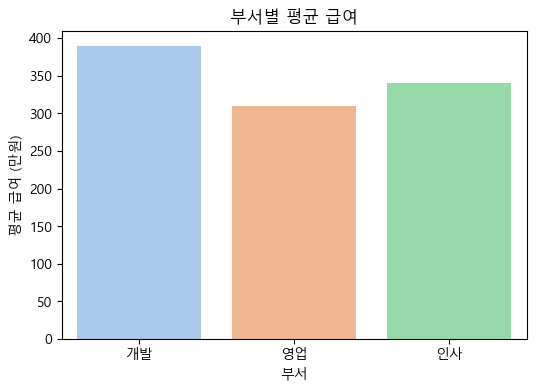

In [36]:
# 막대 그래프 그리기
plt.figure(figsize=(6, 4))
sns.barplot(data=dept_mean, x='부서', y='급여', palette='pastel')
plt.title('부서별 평균 급여')
plt.ylabel('평균 급여 (만원)')